Scaler value type series widget

IntSlider(value=50, continuous_update=False, description='Particle #', max=500, readout_format='.1f')

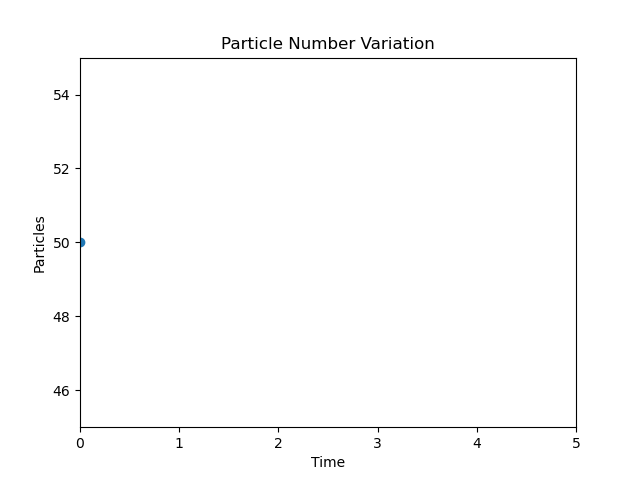

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import logging
import time
import re

sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)
pnumber_data = [50]
time_data = [0]

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((50, 3)) * sideLength:
    Argon(p)


particle_slider = widgets.IntSlider(
    min=0,
    max=500,
    value=50,
    step=1,
    description='Particle #',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

start_time = time.time()

class WidgetUpdateHandler(logging.Handler):
    def __init__(self, *args, **kwargs):
        super().__init__()

    def emit(self, record):
        if "Particle number changed to" in record.msg:
            match = re.search(r"\((.*?),(.*?)\)", record.msg)
            if match:
                new_pnumber = float(match.group(1))
                timestamp = (float(match.group(2)))
                time_data.append(timestamp)
                pnumber_data.append(new_pnumber)
                fig.canvas.draw()

handler = WidgetUpdateHandler(particle_slider)
logger.addHandler(handler)

fig, ax = plt.subplots()
scat = ax.scatter(time_data, pnumber_data, label='Particles')
ax.set_xlabel('Time')
ax.set_ylabel('Particles')
ax.set_title('Particle Number Variation')


def update(frame):
    scat.set_offsets(np.c_[time_data, pnumber_data])
    ax.set_xlim(0, max(time_data) +5)
    ax.set_ylim(min(pnumber_data) - 5, max(pnumber_data) + 5)
    return scat

update(0)

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 100), interval=100, blit=True)

is_updating_pnumber = False

def particleNumber(change):
    global is_updating_pnumber
    change.new
    current = len(tf.Universe.particles)
    deltaParticle = change.new - current 
    if deltaParticle >0  and is_updating_pnumber is False:
        is_updating_pnumber = True
        positions = np.random.uniform(low=0, high=sideLength, size=(deltaParticle, 3))
        for pos in positions:
            Argon(pos)
        end_time = time.time()
        elapsed_time = round(end_time - start_time, 1)
        updated_current = len(tf.Universe.particles)
        logger.info(f"Particle number changed to: {(updated_current), (elapsed_time)}")
        is_updating_pnumber = False
        
    elif deltaParticle <0 and is_updating_pnumber is False:
        is_updating_pnumber = True
        for i in range(-deltaParticle):
            index=np.random.randint(0, len(tf.Universe.particles))
            tf.Universe.particles[index].destroy()
        end_time = time.time()
        elapsed_time = round(end_time - start_time, 1)
        updated_current = len(tf.Universe.particles)
        logger.info(f"Particle number changed to: {(updated_current), (elapsed_time)}")
        is_updating_pnumber = False

particle_slider.observe(particleNumber, names='value')

display(particle_slider)

tf.show()

Histogram widgets

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import logging
import time
import re

sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)
pnumber_data = [50]
time_data = [0]

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((50, 3)) * sideLength:
    Argon(p)


particle_slider = widgets.IntSlider(
    min=0,
    max=500,
    value=50,
    step=1,
    description='Particle #',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

start_time = time.time()

class WidgetUpdateHandler(logging.Handler):
    def __init__(self, *args, **kwargs):
        super().__init__()

    def emit(self, record):
        if "Particle number changed to" in record.msg:
            new_pnumber = float(record.msg.split(": ")[-1])
            pnumber_data.append(new_pnumber)
            ax.clear() 
            ax.set_xlabel('Particles')
            ax.set_ylabel('Frequency')
            ax.set_title('Particle Number Histogram')
            ax.hist(pnumber_data, bins=10) 
            fig.canvas.draw()

handler = WidgetUpdateHandler(particle_slider)
logger.addHandler(handler)

is_updating_pnumber = False


fig, ax = plt.subplots() 
ax.hist(pnumber_data, bins=10)
ax.set_xlabel('Particles')
ax.set_ylabel('Frequency')
ax.set_title('Particle Number Histogram')

def particleNumber(change):
    global is_updating_pnumber
    change.new
    current = len(tf.Universe.particles)
    deltaParticle = change.new - current 
    if deltaParticle >0  and is_updating_pnumber is False:
        is_updating_pnumber = True
        positions = np.random.uniform(low=0, high=sideLength, size=(deltaParticle, 3))
        for pos in positions:
            Argon(pos)
        updated_current = len(tf.Universe.particles)
        logger.info(f"Particle number changed to: {updated_current}")
        is_updating_pnumber = False
        
    elif deltaParticle <0 and is_updating_pnumber is False:
        is_updating_pnumber = True
        for i in range(-deltaParticle):
            index=np.random.randint(0, len(tf.Universe.particles))
            tf.Universe.particles[index].destroy()
        updated_current = len(tf.Universe.particles)
        logger.info(f"Particle number changed to: {updated_current}")
        is_updating_pnumber = False

particle_slider.observe(particleNumber, names='value')

display(particle_slider)

tf.show()
plt.show()

Histogram widget driven by tf events

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import time

sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)
pnumber_data = [1]
time_data = [0]

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((1, 3)) * sideLength:
    Argon(p)


particle_slider = widgets.IntSlider(
    min=0,
    max=500,
    value=1,
    step=1,
    description='Particle #',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)


start_time = time.time()

fig, ax = plt.subplots() 
ax.hist(pnumber_data, bins=10)
ax.set_xlabel('Particles')
ax.set_ylabel('Frequency')
ax.set_title('Particle Number Histogram')

def particleNumber(change):
    current = len(tf.Universe.particles)
    deltaParticle = change.new - current 
    if deltaParticle >0:
        positions = np.random.uniform(low=0, high=sideLength, size=(deltaParticle, 3))
        for pos in positions:
            Argon(pos)
        
    elif deltaParticle <0:
        for i in range(-deltaParticle):
            index=np.random.randint(0, len(tf.Universe.particles))
            tf.Universe.particles[index].destroy()    

def event_update(event):
    global pnumber_data
    current_pnumber = len(tf.Universe.particles)
    print(current_pnumber)
    print(pnumber_data)
    print(tf.Universe.time)
    if current_pnumber != pnumber_data[-1]:
        pnumber_data.append(current_pnumber)
        ax.clear() 
        ax.set_xlabel('Particles')
        ax.set_ylabel('Frequency')
        ax.set_title('Particle Number Histogram')
        ax.hist(pnumber_data, bins=10) 
        fig.canvas.draw()
    return 0

particle_slider.observe(particleNumber, names='value')
tf.event.on_time(invoke_method=event_update, period=0.1, start_time=0.01)

display(particle_slider)

tf.show()
plt.show()

Linked widgets using event system

In [ ]:
import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import time


sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

# create a potential representing a 12-6 Lennard-Jones potential
pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)

start_time = time.time()


class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((1, 3)) * sideLength:
    Argon(p)

radius_text = widgets.FloatText(
    value=0.25,
    min=0.000001,
    max=0.3,
    step=0.05,
    description='Radius',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

radius_slider = widgets.FloatSlider(
    value=0.25,
    min=0.000001,
    max=0.3,
    step=0.05,
    description='Radius',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
    )

def update_radius(new_radius):
    global radius
    old_radius = Argon.radius
    Argon.radius = new_radius
    if abs(old_radius - new_radius) > 0.01:
      for i in range(len(tf.Universe.particles)):
          tf.Universe.particles[i].radius = new_radius

def radius_changed(change):
  new_radius = change.new
  if new_radius >= 0.000001:
      update_radius(new_radius)

def event_update(event):
    global radius
    radius_text.value = Argon.radius
    radius_slider.value = Argon.radius
    return 0


tf.event.on_time(invoke_method=event_update, period=0.1, start_time=0.01)

radius_slider.observe(radius_changed, names='value')
radius_text.observe(radius_changed, names='value')

display(radius_text, radius_slider)
tf.show()

Linked widgets using event system (button)

In [ ]:
import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import time

sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

# create a potential representing a 12-6 Lennard-Jones potential
pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)

start_time = time.time()

class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((1, 3)) * sideLength:
    Argon(p)

radius_text = widgets.FloatText(
    value=0.25,
    min=0.000001,
    max=0.3,
    step=0.05,
    description='Radius',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

button_increase = widgets.Button(description="Increase radius")
output = widgets.Output()

def update_radius(new_radius):
    global radius
    for i in range(len(tf.Universe.particles)):
        tf.Universe.particles[i].radius = new_radius

def on_button_clicked(b):
    with output:
        global radius
        current_radius = Argon.radius
        new_radius = current_radius + 0.1
        print(f"Current radius: {current_radius}, New radius: {new_radius}")
        Argon.radius = new_radius
        if new_radius >= 0.000001:
            update_radius(new_radius)
            print("Radius updated")

def radius_changed(change):
    new_radius = change.new
    if new_radius >= 0.000001:
        update_radius(new_radius)

def event_update(event):
    global radius
    radius_text.value = Argon.radius
    return 0

tf.event.on_time(invoke_method=event_update, period=0.1, start_time=0.01)

button_increase.on_click(on_button_clicked)
radius_text.observe(radius_changed, names='value')

display(radius_text, button_increase, output)
tf.show()

Statistics graph (distribution of particle velocity)

In [ ]:
import tissue_forge as tf
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import ipywidgets as widgets
from IPython.display import display

tf.init(dt=0.1, dim=[15, 12, 10])

a = 0.65

class AType(tf.ParticleTypeSpec):
    radius = 0.3
    style = {"color": "seagreen"}
    dynamics = tf.Overdamped

A = AType.get()


class BType(tf.ParticleTypeSpec):
    radius = 0.3
    style = {"color": "red"}
    dynamics = tf.Overdamped

B = BType.get()


class FixedType(tf.ParticleTypeSpec):
    radius = 0.3
    style = {"color": "blue"}
    frozen = True

Fixed = FixedType.get()

repulse = tf.Potential.coulomb(q=0.08, min=0.01, max=2 * a)

tf.bind.types(repulse, A, A)
tf.bind.types(repulse, A, B)

f = tf.CustomForce(lambda: [0.3, 1 * np.sin(0.4 * tf.Universe.time), 0], 0.01)

tf.bind.force(f, B)

pot = tf.Potential.power(r0=0.5 * a, alpha=2, max=10 * a)

uc = tf.lattice.sc(a, A, lambda i, j: tf.Bond.create(pot, i, j, dissociation_energy=100.0))

parts = tf.lattice.create_lattice(uc, [5, 5, 5])

for p in parts[4, :].flatten():
    p[0].become(B)

for p in parts[0, :].flatten():
    p[0].become(Fixed)

output = widgets.Output()


velocity_data=[[], [], []]

fig, ax = plt.subplots()
ax.set_ylabel('Velocity')
ax.set_title('Particle Velocity')
tick_labels = ['Veloxity X', 'Veloxity Y', 'Veloxity Z']
colors = ['peachpuff', 'orange', 'tomato']
bplot = ax.boxplot(velocity_data, patch_artist=True, tick_labels=tick_labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

def event_update(event):
    global velocity_data

    velocity_data = [[], [], []]

    for particle in tf.Universe.particles:
        if particle in A:
            velocity_data[0].append(particle.velocity[0])
            velocity_data[1].append(particle.velocity[1])
            velocity_data[2].append(particle.velocity[2])
        if particle in B:
            velocity_data[0].append(particle.velocity[0])
            velocity_data[1].append(particle.velocity[1])
            velocity_data[2].append(particle.velocity[2])
        if particle in Fixed:
            velocity_data[0].append(particle.velocity[0])
            velocity_data[1].append(particle.velocity[1])
            velocity_data[2].append(particle.velocity[2])

        ax.clear()
        ax.set_ylabel('Velocity')
        ax.set_title('Particle Velocity')
        tick_labels = ['Veloxity X', 'Veloxity Y', 'Veloxity Z']
        colors = ['peachpuff', 'orange', 'tomato']
        bplot = ax.boxplot(velocity_data, patch_artist=True, tick_labels=tick_labels)
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        fig.canvas.draw()
        
    return 0

tf.event.on_time(invoke_method=event_update, period=0.1, start_time=0.01)

display (output)
tf.show()
plt.show()

Statistics graph (distribution of particle number)

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

import tissue_forge as tf
import ipywidgets as widgets
from IPython.display import display
import time

sideLength = 10
dim = [sideLength, sideLength, sideLength]

# new simulator
tf.init(dim=dim)

class ArgonType(tf.ParticleTypeSpec):
    radius = 0.25
    mass = 39.4
    style = {'color': 'blue'}

pot = tf.Potential.lennard_jones_12_6(0.275, 3.0, 9.5075e-06, 6.1545e-03, 1.0e-3)
pnumber_data = [1]

# Register and get the particle type; registration always only occurs once
Argon = ArgonType.get()
tf.bind.types(pot, Argon, Argon)
for p in np.random.random((1, 3)) * sideLength:
    Argon(p)


particle_slider = widgets.IntSlider(
    min=0,
    max=50,
    value=1,
    step=1,
    description='Particle #',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)


start_time = time.time()


fig, ax = plt.subplots()
ax.set_ylabel('Particles')
ax.set_title('Particle Number')
tick_labels = ['Argon']
colors = ['peachpuff']
bplot = ax.boxplot(pnumber_data, patch_artist=True, tick_labels=tick_labels) 
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


def particleNumber(change):
    current = len(tf.Universe.particles)
    deltaParticle = change.new - current 
    if deltaParticle >0:
        positions = np.random.uniform(low=0, high=sideLength, size=(deltaParticle, 3))
        for pos in positions:
            Argon(pos)
        
    elif deltaParticle <0:
        for i in range(-deltaParticle):
            index=np.random.randint(0, len(tf.Universe.particles))
            tf.Universe.particles[index].destroy()    

def event_update(event):
    global pnumber_data
    current_pnumber = len(tf.Universe.particles)
    if current_pnumber != pnumber_data[-1]:
        pnumber_data.append(current_pnumber)
        ax.clear() 
        ax.set_ylabel('Particles')
        ax.set_title('Particle Number')
        tick_labels = ['Argon']
        colors = ['peachpuff']
        bplot = ax.boxplot(pnumber_data, patch_artist=True, tick_labels=tick_labels) 
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        fig.canvas.draw()

    return 0

particle_slider.observe(particleNumber, names='value')
tf.event.on_time(invoke_method=event_update, period=0.1, start_time=0.01)

display(particle_slider)

tf.show()
plt.show()